<h2 style="text-align:center">How do features shape mobile phone prices in 2025?</h2>



<div style="text-align:center">
  <img src="https://img.freepik.com/premium-photo/display-many-different-cell-phones-table-suitable-technologyrelated-articles-websites_153912-265864.jpg" width="550" height="500">
</div>

## The Question Driving Our Analysis

In 2025, the global smartphone market is more competitive than ever. Devices vary in **brand, model, specifications, release date, and market price**. Prices can range from budget-friendly to ultra-premium, and consumers often wonder: *what really determines the cost of a smartphone?*

Our dataset captures all of these details — from RAM and storage to camera quality and battery capacity.  

But here's the question that drives this investigation:

**Can we predict the price of a smartphone based on its features?**

Using this data, we will explore **trends, correlations, and patterns** in pricing, compare devices across brands and specifications, and attempt to **build predictive models** to estimate a smartphone's price from its attributes.  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os 
print(os.getcwd())
username = os.getlogin()
print(username)

C:\Users\sindi\Downloads
sindi


In [8]:
df = pd.read_csv('Global_Mobile_Prices_2025_Extended.csv')

In [4]:
df = pd.read_csv(r"C:\Users\sindi\Downloads\Global_Mobile_Prices_2025_Extended.csv")
print('Our smartphones:')
display(df)

Our smartphones:


,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Google,Pixel 7a 2,961,8,256,12,4000,5.9,44,Yes,Android,Helio G99,4.0,November,2025
996,OnePlus,OnePlus 13R 423,158,16,64,64,5500,5.6,65,Yes,Android,Dimensity 9300,3.5,November,2025
997,Xiaomi,Poco X6 Pro 796,1164,6,128,200,4500,5.7,120,No,Android,Helio G99,4.8,January,2025
998,Realme,Narzo 70 809,895,8,64,48,5000,7.0,65,No,Android,A18 Pro,4.6,August,2025


In [11]:
print(f'\nMissing  values:\n{df.isnull().sum()}')
print('\n')
print(f"Missing percentage: {(df.isnull().sum() / len(df)) * 100}")



Missing  values:
brand                0
model                0
price_usd            0
ram_gb               0
storage_gb           0
camera_mp            0
battery_mah          0
display_size_inch    0
charging_watt        0
5g_support           0
os                   0
processor            0
rating               0
release_month        0
year                 0
dtype: int64


Missing percentage: brand                0.0
model                0.0
price_usd            0.0
ram_gb               0.0
storage_gb           0.0
camera_mp            0.0
battery_mah          0.0
display_size_inch    0.0
charging_watt        0.0
5g_support           0.0
os                   0.0
processor            0.0
rating               0.0
release_month        0.0
year                 0.0
dtype: float64


In [12]:
print(f"----Searching for duplicated rows:----")
df.duplicated().sum()

----Searching for duplicated rows:----


np.int64(0)

### Exploring the Dataset Columns and the data types


In [13]:
df.columns
df.dtypes

brand                 object
model                 object
price_usd              int64
ram_gb                 int64
storage_gb             int64
camera_mp              int64
battery_mah            int64
display_size_inch    float64
charging_watt          int64
5g_support            object
os                    object
processor             object
rating               float64
release_month         object
year                   int64
dtype: object

In [14]:
print(f'The last smartphones in our records:{df.tail(10)}')

The last smartphones in our records:       brand             model  price_usd  ram_gb  storage_gb  camera_mp  \
990   Google  Pixel Fold 2 610       1224      12          64         48   
991   Realme       11 Pro+ 634        629      16        1024         12   
992   Google       Pixel 8 175       1164       8         128         12   
993     Oppo       Reno 11 777        178       6        1024         50   
994   Realme       11 Pro+ 927        110       6         512         50   
995   Google        Pixel 7a 2        961       8         256         12   
996  OnePlus   OnePlus 13R 423        158      16          64         64   
997   Xiaomi   Poco X6 Pro 796       1164       6         128        200   
998   Realme      Narzo 70 809        895       8          64         48   
999   Xiaomi   Mi 13 Ultra 429        458      16         512         64   

     battery_mah  display_size_inch  charging_watt 5g_support       os  \
990         5000                6.0             33   

### Viewing the Last Records

The following code displays the **last 10 entries** of our dataset.  
This helps us quickly check:

- The most recent smartphones added to the dataset  
- Their corresponding features and market prices  
- Whether the data at the end of the dataset looks consistent and complete


## Understanding the Dataset: Shape and Info


In [15]:
df.info()
print('\n')
print(f'---------{df.shape}-----------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   model              1000 non-null   object 
 2   price_usd          1000 non-null   int64  
 3   ram_gb             1000 non-null   int64  
 4   storage_gb         1000 non-null   int64  
 5   camera_mp          1000 non-null   int64  
 6   battery_mah        1000 non-null   int64  
 7   display_size_inch  1000 non-null   float64
 8   charging_watt      1000 non-null   int64  
 9   5g_support         1000 non-null   object 
 10  os                 1000 non-null   object 
 11  processor          1000 non-null   object 
 12  rating             1000 non-null   float64
 13  release_month      1000 non-null   object 
 14  year               1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 117.3+ KB


---------(10

### Numerical and categorical distributions(showing relevant columns)

In [16]:
print('\nNumeric distributions\n', df.describe())


Numeric distributions
          price_usd      ram_gb   storage_gb    camera_mp  battery_mah  \
count  1000.000000  1000.00000  1000.000000  1000.000000  1000.000000   
mean    813.478000     9.17200   402.880000    83.534000  5012.000000   
std     411.708367     4.32633   349.405893    62.504958   711.591429   
min     101.000000     4.00000    64.000000    12.000000  4000.000000   
25%     449.250000     6.00000   128.000000    48.000000  4500.000000   
50%     822.000000     8.00000   256.000000    64.000000  5000.000000   
75%    1166.250000    12.00000   512.000000   108.000000  5500.000000   
max    1499.000000    16.00000  1024.000000   200.000000  6000.000000   

       display_size_inch  charging_watt       rating    year  
count        1000.000000    1000.000000  1000.000000  1000.0  
mean            6.380600      63.791000     4.229900  2025.0  
std             0.496841      36.333751     0.439965     0.0  
min             5.500000      18.000000     3.500000  2025.0  
25%

In [17]:
df.describe()

,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,rating,year
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,813.478000,9.17200,402.880000,83.534000,5012.000000,6.380600,63.791000,4.229900,2025.0
std,411.708367,4.32633,349.405893,62.504958,711.591429,0.496841,36.333751,0.439965,0.0
min,101.000000,4.00000,64.000000,12.000000,4000.000000,5.500000,18.000000,3.500000,2025.0
25%,449.250000,6.00000,128.000000,48.000000,4500.000000,6.000000,33.000000,3.800000,2025.0
50%,822.000000,8.00000,256.000000,64.000000,5000.000000,6.400000,65.000000,4.200000,2025.0
75%,1166.250000,12.00000,512.000000,108.000000,5500.000000,6.800000,100.000000,4.600000,2025.0
max,1499.000000,16.00000,1024.000000,200.000000,6000.000000,7.200000,120.000000,5.000000,2025.0


### Summary of Numeric Features

The dataset contains **1,000 smartphones**, and the numeric summary reveals several key insights:

- **Prices** range from **$101 to $1499**, with an average of **$813**, showing a wide variety of budget, mid-range, and flagship devices.
- **RAM** typically falls between **4–16 GB**, with a median of **8 GB**, reflecting modern performance standards.
- **Storage** varies from **64 GB to 1 TB**, with a strong middle range around **256–512 GB**.
- **Camera resolutions** range broadly (**12–200 MP**), indicating different market segments.
- **Battery capacity** centers around **5000 mAh**, a common benchmark for 2025 smartphones.
- **Display sizes** average **6.38 inches**, consistent with current large-screen trends.
- **Charging wattage** spans **18–120W**, showing clear differences between entry-level and premium models.
- **Ratings** sit mostly between **3.5–5.0**, with an average of **4.23**, suggesting overall positive user feedback.

These statistics help us understand the **general market landscape** and guide which features may influence smartphone pricing the most.


In [18]:
for col in df.select_dtypes(include='object').columns:
    print(f'\n{col} value counts:\n{df[col].value_counts()}')


brand value counts:
brand
Vivo       122
Google     116
OnePlus    116
Xiaomi     114
Oppo       110
Apple      107
Realme     105
Infinix    105
Samsung    105
Name: count, dtype: int64

model value counts:
model
Galaxy S24 Ultra 700    2
Note 40 Pro 443         2
Narzo 70 335            2
iPhone 14 43            2
Nord CE 4 Lite 268      2
                       ..
Pixel 7a 2              1
OnePlus 13R 423         1
Poco X6 Pro 796         1
Narzo 70 809            1
Mi 13 Ultra 429         1
Name: count, Length: 992, dtype: int64

5g_support value counts:
5g_support
Yes    503
No     497
Name: count, dtype: int64

os value counts:
os
Android    893
iOS        107
Name: count, dtype: int64

processor value counts:
processor
Dimensity 9300         138
Tensor G4              133
Snapdragon 8 Gen 3     132
Helio G99              128
Exynos 2400            124
Snapdragon 6 Gen 1     118
Snapdragon 7+ Gen 2    115
A18 Pro                112
Name: count, dtype: int64

release_month value 

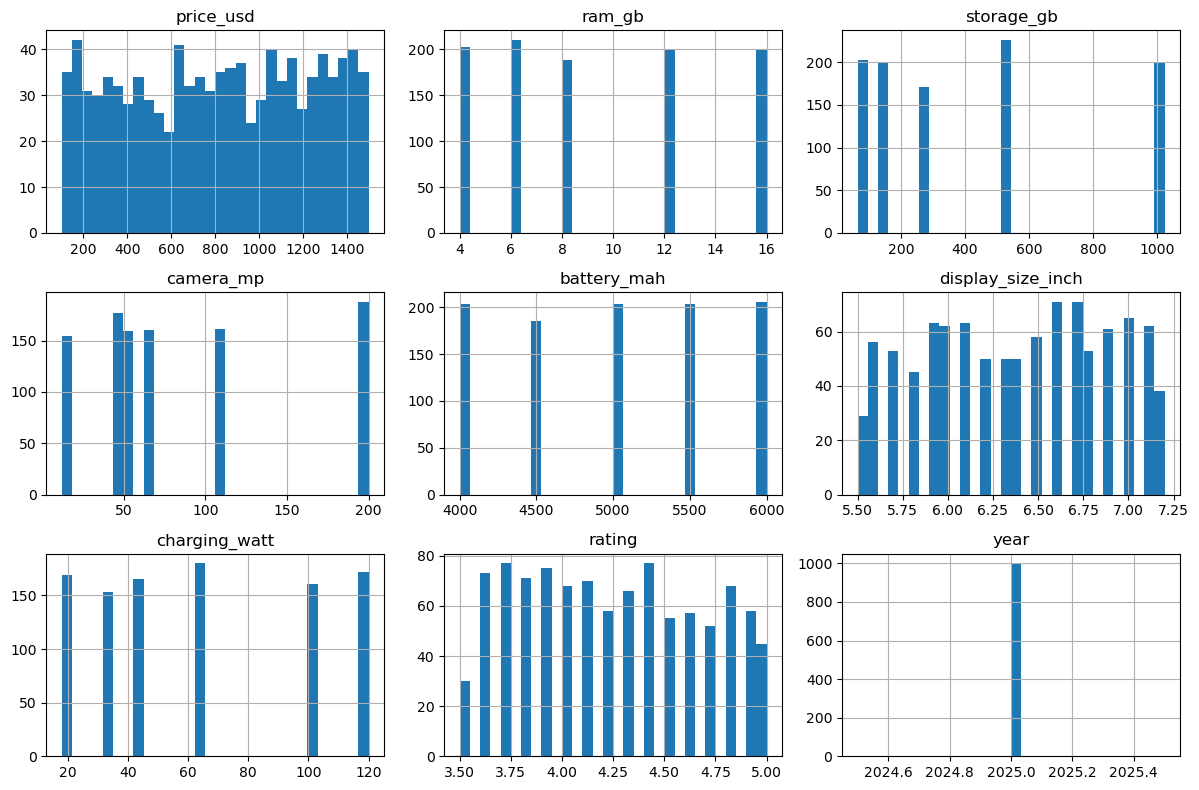

'num_cols = df.select_dtypes(include=\'number\').columns\nfor col in num_cols:\n    plt.figure()\n    plt.hist(df[col], bins=30)\n    plt.title(col)\n    plt.xlabel(col)\n    plt.ylabel("Count")\n    plt.show()'

In [19]:
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show() #a built in shortcut pandas looks in df and select just num cols its like doing plt.hist(df[col], bins=30)

"""num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()"""

### Converting object to categorical dtype

In [20]:
for col in df.select_dtypes('object').columns:
    print(df[col].astype('category'))

0         Oppo
1       Realme
2       Xiaomi
3         Vivo
4        Apple
        ...   
995     Google
996    OnePlus
997     Xiaomi
998     Realme
999     Xiaomi
Name: brand, Length: 1000, dtype: category
Categories (9, object): ['Apple', 'Google', 'Infinix', 'OnePlus', ..., 'Realme', 'Samsung', 'Vivo', 'Xiaomi']
0                    A98 111
1                11 Pro+ 843
2      Redmi Note 14 Pro 461
3                   V29e 744
4      iPhone 16 Pro Max 927
               ...          
995               Pixel 7a 2
996          OnePlus 13R 423
997          Poco X6 Pro 796
998             Narzo 70 809
999          Mi 13 Ultra 429
Name: model, Length: 1000, dtype: category
Categories (992, object): ['11 Pro+ 103', '11 Pro+ 210', '11 Pro+ 320', '11 Pro+ 376', ..., 'iPhone 16 Pro Max 945', 'iPhone 16 Pro Max 954', 'iPhone 16 Pro Max 955', 'iPhone 16 Pro Max 988']
0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997     No
998     No
999     No
Name: 5

### We have to check for outliers(numerical dtypes) because can distort statistics and models

In [21]:
def find_outliers(series, k=1.5):    #rregull se sa larg lejohet të jetë një vlerë nga mesatarja” për ta quajtur outlier. lower k sensitive more outliers, higher k just more extremes. 
    Q1 = series.quantile(0.25)    #k=1.5 moderate outliers values far from the middle 50%, k= 3 only extreme outliers, very far
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR
    return series[(series < lower) | (series > upper)]   #Anything below lower or above upper is considered an outlier
num_cols = ['price_usd', 'ram_gb', 'storage_gb', 'camera_mp', 'battery_mah', 'display_size_inch', 'charging_watt']
    
for col in num_cols:
    outliers = find_outliers(df[col])
    print(f'{col} : {len(outliers)} outliers')

price_usd : 0 outliers
ram_gb : 0 outliers
storage_gb : 0 outliers
camera_mp : 188 outliers
battery_mah : 0 outliers
display_size_inch : 0 outliers
charging_watt : 0 outliers


In [22]:
camera_out = find_outliers(df['camera_mp'])
df.loc[camera_out.index].sort_values('camera_mp', ascending=False).head(20)


,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025
5,OnePlus,Nord 4 295,938,16,512,200,5000,6.2,120,No,Android,Exynos 2400,3.7,May,2025
10,Samsung,Galaxy Z Fold6 423,1093,8,1024,200,4000,5.6,100,Yes,Android,Snapdragon 8 Gen 3,4.1,April,2025
12,Vivo,V30 400,223,8,512,200,5500,6.3,18,Yes,Android,Helio G99,4.9,December,2025
17,Samsung,Galaxy Z Fold6 163,1339,6,512,200,4500,6.2,120,Yes,Android,Snapdragon 7+ Gen 2,4.7,May,2025
18,OnePlus,Nord CE 4 Lite 503,642,8,256,200,5500,7.1,33,No,Android,Exynos 2400,4.2,April,2025
19,OnePlus,OnePlus 12 729,127,16,256,200,5500,5.7,44,Yes,Android,Snapdragon 7+ Gen 2,5.0,January,2025
26,Infinix,Note 40 Pro 925,882,4,128,200,4000,6.6,44,Yes,Android,Exynos 2400,4.1,April,2025
29,Vivo,X100 Pro 546,412,4,512,200,4500,6.3,44,No,Android,Tensor G4,3.9,April,2025
35,Oppo,Reno 11 961,1451,6,128,200,5500,6.9,120,Yes,Android,Tensor G4,4.2,September,2025


#### In the camera megapixels column, 188 rows have values that are unusually high or unusually low compared to normal.

#### Outliers = values outside the normal range, detected using the IQR method (k=1.5)

### Boxplot - Visualization for checking outliers

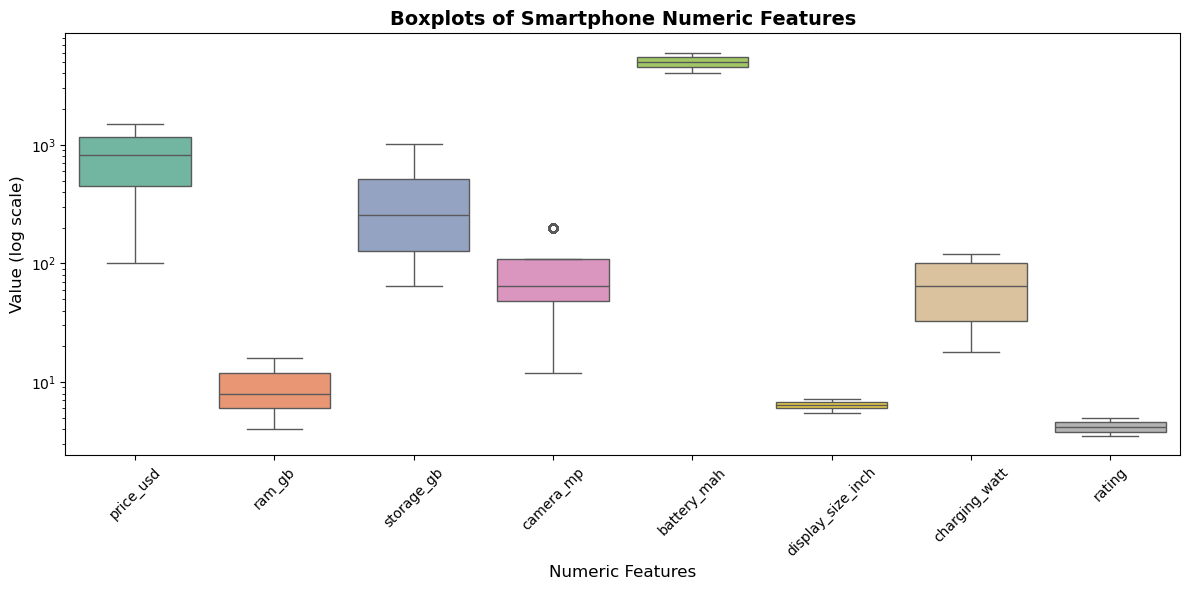

In [23]:
num_cols = ['price_usd', 'ram_gb', 'storage_gb', 'camera_mp', 
            'battery_mah', 'display_size_inch', 'charging_watt', 'rating']

# Create figure
plt.figure(figsize=(12, 6))

# Boxplot with numeric features
sns.boxplot(data=df[num_cols], palette='Set2')

# Labels and title
plt.xlabel('Numeric Features', fontsize=12) #feature name
plt.ylabel('Value (log scale)', fontsize=12) #value for each feature
plt.title('Boxplots of Smartphone Numeric Features', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set y-axis to log scale to handle different value ranges
plt.yscale('log')

plt.tight_layout()
plt.show()


# Boxplot Summary for Smartphone Dataset

Each boxplot shows the distribution of one numeric feature:

- **Box**: Middle 50% of data (Q1 to Q3)
- **Line inside box**: Median (Q2)
- **Whiskers**: Range of non-outlier values
- **Dots outside whiskers**: Outliers (unusually high or low values)

### Features:

- **price_usd**: Prices of phones; median shows typical price; outliers = very expensive/cheap phones.
- **ram_gb**: RAM sizes; shows common memory; outliers = unusually low/high RAM.
- **storage_gb**: Storage capacity; reveals common sizes; outliers = very small or huge storage.
- **camera_mp**: Camera megapixels; median = typical camera; outliers = very high-res cameras.
- **battery_mah**: Battery size; median = usual battery; outliers = extremely high or low capacity.
- **display_size_inch**: Screen size; median = common screen size; outliers = very small or large screens.
- **charging_watt**: Charging speed; median = common fast charging; outliers = unusually low/high wattage.
- **rating**: User ratings; median = typical rating; outliers = extremely good or bad rated phones.

#### Pivot table

In [24]:
pivot_summary = df.pivot_table(
    index='os',
    columns='5g_support',   # now it exists
    values=['price_usd', 'ram_gb', 'storage_gb', 'rating'],
    aggfunc=['mean', 'max', 'min'],
    fill_value=0
)
display(pivot_summary)
#you should read again the csv to get the original df not the transformed one.


mean                                                    \
             price_usd                ram_gb            rating             
5g_support          No         Yes        No     Yes        No       Yes   
os                                                                         
Android     814.162896  807.536585  9.158371  9.2949  4.243213  4.218404   
iOS         883.472727  785.153846  8.909091  8.5000  4.252727  4.192308   

                                         max        ...                   \
            storage_gb             price_usd        ... storage_gb         
5g_support          No         Yes        No   Yes  ...         No   Yes   
os                                                  ...                    
Android     401.375566  406.279379      1496  1499  ...       1024  1024   
iOS         384.000000  406.153846      1477  1467  ...       1024  1024   

                 min                                             
           price_usd      ram_gb     rating      storage_gb      
5g_support        No  Yes     No Yes     No  Yes         No Yes  
os                                                               
Android          101  105      4   4    3.5  3.5         64  64  
iOS              126  151      4   4    3.5  3.5         64  64  

[2 rows x 24 columns]

### Pivot Table Analysis: OS vs 5G Support

- **Operating Systems:** The table compares Android and iOS devices.  
- **5G Support:** Each OS is divided into devices with 5G (`Yes`) and without 5G (`No`).  
- **Price (`price_usd`):** 5G devices are generally more expensive than non-5G devices for both Android and iOS.  
- **RAM (`ram_gb`):** 5G devices tend to have slightly more RAM, indicating higher performance models.  
- **Storage (`storage_gb`):** Storage capacity is higher on average for 5G devices.  
- **Rating (`rating`):** Average user ratings are similar between 5G and non-5G devices, with some high-end 5G models reaching the maximum ratings.  

**Conclusion:** 5G devices, regardless of OS, are typically premium smartphones with higher price, RAM, and storage. Non-5G devices are more budget-friendly alternatives.


## Encoding

In [25]:
df.columns

Index(['brand', 'model', 'price_usd', 'ram_gb', 'storage_gb', 'camera_mp',
       'battery_mah', 'display_size_inch', 'charging_watt', '5g_support', 'os',
       'processor', 'rating', 'release_month', 'year'],
      dtype='object')

### Encoding the 5G Support Column

In [26]:
df_encoded = pd.read_csv('Global_Mobile_Prices_2025_Extended.csv')
df_encoded['5g_support_clean'] = df_encoded['5g_support'].str.lower().str.strip()
df_encoded['5g_encoded'] = df_encoded['5g_support_clean'].map({'yes':1, 'no':0})
df_encoded.head(3)   #Binary encoding


,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year,5g_support_clean,5g_encoded
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025,yes,1
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025,yes,1
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025,yes,1


In [27]:
df_encoded = df_encoded.drop(columns=['5g_support', '5g_support_clean'])
df_encoded.head(3)
print(df_encoded.columns.tolist())


['brand', 'model', 'price_usd', 'ram_gb', 'storage_gb', 'camera_mp', 'battery_mah', 'display_size_inch', 'charging_watt', 'os', 'processor', 'rating', 'release_month', 'year', '5g_encoded']


### Encoding the Operating System (OS) Column

In [28]:

df_encoded = pd.get_dummies(df_encoded, columns=['os'], prefix='os')  # until here will give you true false cols
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

display(df_encoded.head())  # dummies will give new cols from the encoding of one, because after original cols dont exists.
#This change is done in a copy of original df so you have to refer to copy df if you want the updated one

,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,processor,rating,release_month,year,5g_encoded,os_Android,os_iOS
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Helio G99,3.8,February,2025,1,1,0
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Tensor G4,4.4,August,2025,1,1,0
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,A18 Pro,4.1,March,2025,1,1,0
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Exynos 2400,4.1,August,2025,1,1,0
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Dimensity 9300,3.5,February,2025,1,0,1


### Dropping model column

In [29]:
df_encoded = df_encoded.drop(columns=['model'])
df_encoded.head()

,brand,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,processor,rating,release_month,year,5g_encoded,os_Android,os_iOS
0,Oppo,855,16,128,108,6000,6.6,33,Helio G99,3.8,February,2025,1,1,0
1,Realme,618,6,128,64,4500,6.9,100,Tensor G4,4.4,August,2025,1,1,0
2,Xiaomi,258,16,64,64,4000,6.8,44,A18 Pro,4.1,March,2025,1,1,0
3,Vivo,837,6,512,48,4500,6.0,65,Exynos 2400,4.1,August,2025,1,1,0
4,Apple,335,12,128,200,5000,6.9,100,Dimensity 9300,3.5,February,2025,1,0,1


### Binning the Storage Capacity (storage_gb)

In [30]:
bins = [0, 128, 256, float('inf')]
labels = ['Low', 'Mid', 'High']

df_encoded['storage_bin'] = pd.cut(df_encoded['storage_gb'], bins=bins, labels=labels)

df_encoded.head()

,brand,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,processor,rating,release_month,year,5g_encoded,os_Android,os_iOS,storage_bin
0,Oppo,855,16,128,108,6000,6.6,33,Helio G99,3.8,February,2025,1,1,0,Low
1,Realme,618,6,128,64,4500,6.9,100,Tensor G4,4.4,August,2025,1,1,0,Low
2,Xiaomi,258,16,64,64,4000,6.8,44,A18 Pro,4.1,March,2025,1,1,0,Low
3,Vivo,837,6,512,48,4500,6.0,65,Exynos 2400,4.1,August,2025,1,1,0,High
4,Apple,335,12,128,200,5000,6.9,100,Dimensity 9300,3.5,February,2025,1,0,1,Low


### Encoding storage_gb column

In [31]:
bin_map = {'Low':1, 'Mid':2, 'High':3}   
df_encoded['storage_encoded'] = df_encoded['storage_bin'].map(bin_map).astype(int)
display(df_encoded)
#df_encoded['storage_encoded'].dtypes = categorical after creating new encoded


,brand,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,processor,rating,release_month,year,5g_encoded,os_Android,os_iOS,storage_bin,storage_encoded
0,Oppo,855,16,128,108,6000,6.6,33,Helio G99,3.8,February,2025,1,1,0,Low,1
1,Realme,618,6,128,64,4500,6.9,100,Tensor G4,4.4,August,2025,1,1,0,Low,1
2,Xiaomi,258,16,64,64,4000,6.8,44,A18 Pro,4.1,March,2025,1,1,0,Low,1
3,Vivo,837,6,512,48,4500,6.0,65,Exynos 2400,4.1,August,2025,1,1,0,High,3
4,Apple,335,12,128,200,5000,6.9,100,Dimensity 9300,3.5,February,2025,1,0,1,Low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Google,961,8,256,12,4000,5.9,44,Helio G99,4.0,November,2025,1,1,0,Mid,2
996,OnePlus,158,16,64,64,5500,5.6,65,Dimensity 9300,3.5,November,2025,1,1,0,Low,1
997,Xiaomi,1164,6,128,200,4500,5.7,120,Helio G99,4.8,January,2025,0,1,0,Low,1
998,Realme,895,8,64,48,5000,7.0,65,A18 Pro,4.6,August,2025,0,1,0,Low,1


### Binning the Release Month into Seasons

In [32]:
print(df_encoded.columns)
df['release_month'].unique()


Index(['brand', 'price_usd', 'ram_gb', 'storage_gb', 'camera_mp',
       'battery_mah', 'display_size_inch', 'charging_watt', 'processor',
       'rating', 'release_month', 'year', '5g_encoded', 'os_Android', 'os_iOS',
       'storage_bin', 'storage_encoded'],
      dtype='object')


array(['February', 'August', 'March', 'May', 'April', 'November', 'July',
       'December', 'October', 'January', 'June', 'September'],
      dtype=object)

In [33]:
df_work = df_encoded.copy()
season_map = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}

# Save to a new column in the copy
df_work['release_season_new'] = df_work['release_month'].map(season_map)


In [34]:
df_work.columns

Index(['brand', 'price_usd', 'ram_gb', 'storage_gb', 'camera_mp',
       'battery_mah', 'display_size_inch', 'charging_watt', 'processor',
       'rating', 'release_month', 'year', '5g_encoded', 'os_Android', 'os_iOS',
       'storage_bin', 'storage_encoded', 'release_season_new'],
      dtype='object')

### Encoding release month

In [35]:
df_work = pd.get_dummies(df_work, columns=['release_season_new'], prefix='season', drop_first=False)
display(df_work)

,brand,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,processor,rating,...,year,5g_encoded,os_Android,os_iOS,storage_bin,storage_encoded,season_Autumn,season_Spring,season_Summer,season_Winter
0,Oppo,855,16,128,108,6000,6.6,33,Helio G99,3.8,...,2025,1,1,0,Low,1,False,False,False,True
1,Realme,618,6,128,64,4500,6.9,100,Tensor G4,4.4,...,2025,1,1,0,Low,1,False,False,True,False
2,Xiaomi,258,16,64,64,4000,6.8,44,A18 Pro,4.1,...,2025,1,1,0,Low,1,False,True,False,False
3,Vivo,837,6,512,48,4500,6.0,65,Exynos 2400,4.1,...,2025,1,1,0,High,3,False,False,True,False
4,Apple,335,12,128,200,5000,6.9,100,Dimensity 9300,3.5,...,2025,1,0,1,Low,1,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Google,961,8,256,12,4000,5.9,44,Helio G99,4.0,...,2025,1,1,0,Mid,2,True,False,False,False
996,OnePlus,158,16,64,64,5500,5.6,65,Dimensity 9300,3.5,...,2025,1,1,0,Low,1,True,False,False,False
997,Xiaomi,1164,6,128,200,4500,5.7,120,Helio G99,4.8,...,2025,0,1,0,Low,1,False,False,False,True
998,Realme,895,8,64,48,5000,7.0,65,A18 Pro,4.6,...,2025,0,1,0,Low,1,False,False,True,False


In [36]:
bool_cols = df_work.select_dtypes(include='bool').columns
df_work[bool_cols] = df_work[bool_cols].astype(int)
display(df_work)


,brand,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,processor,rating,...,year,5g_encoded,os_Android,os_iOS,storage_bin,storage_encoded,season_Autumn,season_Spring,season_Summer,season_Winter
0,Oppo,855,16,128,108,6000,6.6,33,Helio G99,3.8,...,2025,1,1,0,Low,1,0,0,0,1
1,Realme,618,6,128,64,4500,6.9,100,Tensor G4,4.4,...,2025,1,1,0,Low,1,0,0,1,0
2,Xiaomi,258,16,64,64,4000,6.8,44,A18 Pro,4.1,...,2025,1,1,0,Low,1,0,1,0,0
3,Vivo,837,6,512,48,4500,6.0,65,Exynos 2400,4.1,...,2025,1,1,0,High,3,0,0,1,0
4,Apple,335,12,128,200,5000,6.9,100,Dimensity 9300,3.5,...,2025,1,0,1,Low,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Google,961,8,256,12,4000,5.9,44,Helio G99,4.0,...,2025,1,1,0,Mid,2,1,0,0,0
996,OnePlus,158,16,64,64,5500,5.6,65,Dimensity 9300,3.5,...,2025,1,1,0,Low,1,1,0,0,0
997,Xiaomi,1164,6,128,200,4500,5.7,120,Helio G99,4.8,...,2025,0,1,0,Low,1,0,0,0,1
998,Realme,895,8,64,48,5000,7.0,65,A18 Pro,4.6,...,2025,0,1,0,Low,1,0,0,1,0


## Feature Engineering

In [37]:
df_work['charging_efficiency'] = df_work['battery_mah'] / df_work['charging_watt']
df_work.head()

,brand,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,processor,rating,...,5g_encoded,os_Android,os_iOS,storage_bin,storage_encoded,season_Autumn,season_Spring,season_Summer,season_Winter,charging_efficiency
0,Oppo,855,16,128,108,6000,6.6,33,Helio G99,3.8,...,1,1,0,Low,1,0,0,0,1,181.818182
1,Realme,618,6,128,64,4500,6.9,100,Tensor G4,4.4,...,1,1,0,Low,1,0,0,1,0,45.000000
2,Xiaomi,258,16,64,64,4000,6.8,44,A18 Pro,4.1,...,1,1,0,Low,1,0,1,0,0,90.909091
3,Vivo,837,6,512,48,4500,6.0,65,Exynos 2400,4.1,...,1,1,0,High,3,0,0,1,0,69.230769
4,Apple,335,12,128,200,5000,6.9,100,Dimensity 9300,3.5,...,1,0,1,Low,1,0,0,0,1,50.000000


### Charging Efficiency
**Formula:**  
`charging_efficiency = battery_mah / charging_watt`

**Meaning:**  
How big the battery is compared to how fast it charges.

**Simple Explanation:**  
- A **high value** means the phone has a **large battery** but **charges more slowly**.  
- A **low value** means the phone has a **smaller battery** but **charges faster**.

**In one sentence:**  
It shows how much battery you get for each unit of charging power.


In [38]:
df_work['price_per_storage'] = df_work['price_usd'] / df_work['storage_gb']
df_work.head()

,brand,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,processor,rating,...,os_Android,os_iOS,storage_bin,storage_encoded,season_Autumn,season_Spring,season_Summer,season_Winter,charging_efficiency,price_per_storage
0,Oppo,855,16,128,108,6000,6.6,33,Helio G99,3.8,...,1,0,Low,1,0,0,0,1,181.818182,6.679688
1,Realme,618,6,128,64,4500,6.9,100,Tensor G4,4.4,...,1,0,Low,1,0,0,1,0,45.000000,4.828125
2,Xiaomi,258,16,64,64,4000,6.8,44,A18 Pro,4.1,...,1,0,Low,1,0,1,0,0,90.909091,4.031250
3,Vivo,837,6,512,48,4500,6.0,65,Exynos 2400,4.1,...,1,0,High,3,0,0,1,0,69.230769,1.634766
4,Apple,335,12,128,200,5000,6.9,100,Dimensity 9300,3.5,...,0,1,Low,1,0,0,0,1,50.000000,2.617188


### Explanation of `price_per_storage`

This metric tells you **how much money you are paying for each gigabyte (GB) of storage** in a smartphone.

It is calculated by dividing the phone’s price (`price_usd`) by its storage size (`storage_gb`).

- **Higher value:** Storage is more expensive relative to the phone’s price.  
- **Lower value:** Storage is cheaper compared to the overall price.  

This metric helps you compare phones to see which one gives **better storage value**.


In [39]:
df_encoded['price_per_ram'] = df_encoded['price_usd'] / df_encoded['ram_gb']
df_encoded.head()

,brand,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,processor,rating,release_month,year,5g_encoded,os_Android,os_iOS,storage_bin,storage_encoded,price_per_ram
0,Oppo,855,16,128,108,6000,6.6,33,Helio G99,3.8,February,2025,1,1,0,Low,1,53.437500
1,Realme,618,6,128,64,4500,6.9,100,Tensor G4,4.4,August,2025,1,1,0,Low,1,103.000000
2,Xiaomi,258,16,64,64,4000,6.8,44,A18 Pro,4.1,March,2025,1,1,0,Low,1,16.125000
3,Vivo,837,6,512,48,4500,6.0,65,Exynos 2400,4.1,August,2025,1,1,0,High,3,139.500000
4,Apple,335,12,128,200,5000,6.9,100,Dimensity 9300,3.5,February,2025,1,0,1,Low,1,27.916667


### Explanation of `price_per_ram`

This metric tells you **how much money you are paying for each gigabyte (GB) of RAM** in a smartphone.

It is calculated by dividing the phone’s price (`price_usd`) by its RAM size (`ram_gb`).

- **Higher value:** RAM is more expensive relative to the phone’s price.  
- **Lower value:** RAM is cheaper, giving more memory for less money. 

## 📌 Correlation Analysis of Smartphone Features

In [40]:
df = pd.read_csv(r"C:\Users\sindi\OneDrive\Documents\Machine Learning\Global_Mobile_Prices_2025_Extended.csv")
corr = df.corr(numeric_only=True)
corr

,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,rating,year
price_usd,1.000000,-0.023628,0.000730,0.015682,-0.006909,-0.023611,0.014869,-0.001010,NaN
ram_gb,-0.023628,1.000000,0.013488,0.011987,0.024691,0.003696,0.001560,-0.060605,NaN
storage_gb,0.000730,0.013488,1.000000,0.030576,-0.026807,0.012260,0.050683,0.028872,NaN
camera_mp,0.015682,0.011987,0.030576,1.000000,0.004402,-0.057576,0.008465,0.032554,NaN
battery_mah,-0.006909,0.024691,-0.026807,0.004402,1.000000,0.013966,-0.003426,0.011322,NaN
display_size_inch,-0.023611,0.003696,0.012260,-0.057576,0.013966,1.000000,0.053701,0.011403,NaN
charging_watt,0.014869,0.001560,0.050683,0.008465,-0.003426,0.053701,1.000000,0.032803,NaN
rating,-0.001010,-0.060605,0.028872,0.032554,0.011322,0.011403,0.032803,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 📌 Interpreting the Correlation Matrix for Smartphone Dataset

- **Price independence:** `price_usd` is largely independent of other numeric features; higher RAM, storage, or screen size does not strongly increase price in this dataset.  
- **Weak feature correlations:** Most numeric features have very low correlations with each other, indicating they vary mostly independently.  
- **Slight patterns:** Small positive or negative correlations exist (e.g., `ram_gb` vs `rating` slightly negative, `storage_gb` vs `charging_watt` slightly positive), but none are strong.

## 📘 Dataset Variable Meaning – Explained Clearly

| Variable           | Meaning                                                     | Type        |
| ------------------ | ----------------------------------------------------------- | ----------- |
| **brand**          | Brand / company of the phone (e.g., Xiaomi, Apple, Samsung) | Categorical |
| **model**          | The phone model name                                        | Text        |
| **price**          | Phone price in USD/EUR                                      | Numerical   |
| **ram**            | RAM capacity in GB                                          | Numerical   |
| **storage**        | Internal storage (ROM) in GB                                | Numerical   |
| **camera_mp**      | Rear camera megapixels                                      | Numerical   |
| **battery**        | Battery capacity in mAh                                     | Numerical   |
| **screen_size**    | Screen size in inches                                       | Numerical   |
| **charging_speed** | Charging speed in watts                                     | Numerical   |


### 📡 Connectivity & Performance

| Variable       | Meaning                                               | Type                         |
| -------------- | ----------------------------------------------------- | ---------------------------- |
| **5g_support** | Whether the phone supports 5G (Yes/No)                | Categorical → encoded as 1/0 |
| **processor**  | Name of the chipset (e.g., Helio G99, Dimensity 9300) | Categorical                  |
| **rating**     | User or technical review rating (0–5)                 | Numerical                    |


### 📅 Release Information

| Variable          | Meaning                           | Type        |
| ----------------- | --------------------------------- | ----------- |
| **release_month** | Month when the phone was released | Categorical |
| **year**          | Release year                      | Numerical   |


### 🗂️ Engineered Encoding Columns

| Encoded Column      | Meaning                             |
| ------------------- | ----------------------------------- |
| **5g_encoded**      | 1 = Yes, 0 = No                     |
| **os_Android**      | 1 = Android, 0 = Not Android        |
| **os_iOS**          | 1 = iOS, 0 = Not iOS                |
| **storage_bin**     | Categorized storage (Low/Mid/High)  |
| **storage_encoded** | Ordinal: 0 = Low, 1 = Mid, 2 = High |


# 📊 Introduction to Data Visualization
In this project, I will analyze the main features of the dataset through different visualizations to observe how each variable behaves and how they relate to one another. This exploratory analysis will help guide the data preprocessing steps and support the selection of appropriate machine learning algorithms.

## 🥧 Pie Chart(Top 10 Brands)

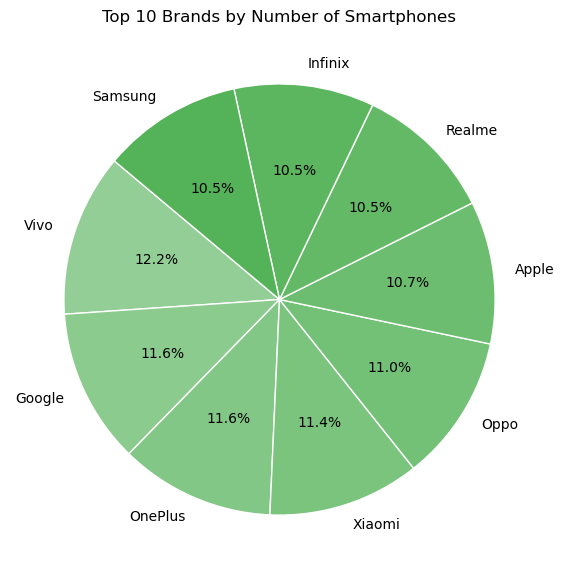

In [57]:
import matplotlib.colors as mcolors
# Top 10 brands
top_brands = df_encoded['brand'].value_counts().nlargest(10)

# Base color
base_color = "#4CAF50"  # green

# Generate 10 shades of the base color
colors = list(mcolors.LinearSegmentedColormap.from_list("shades", ["#A5D6A7", base_color])(np.linspace(0.2, 1, 10)))

plt.figure(figsize=(7,7))
plt.pie(
    top_brands, 
    labels=top_brands.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    wedgeprops={'edgecolor':'white'}
)
plt.title("Top 10 Brands by Number of Smartphones")
plt.show()

### 📌 Summary of the Top 10 Smartphone Brands Visualization

The pie chart illustrates the distribution of the top 10 smartphone brands based on the number of models included in the dataset. It highlights which brands have released more smartphone models, which brands appear more frequently in the data, and which ones dominate the overall dataset distribution. This visualization reflects the presence and activity of each brand within the dataset, but it does not represent customer preference or market popularity.


## 🥧 Pie Chart(OS_system)

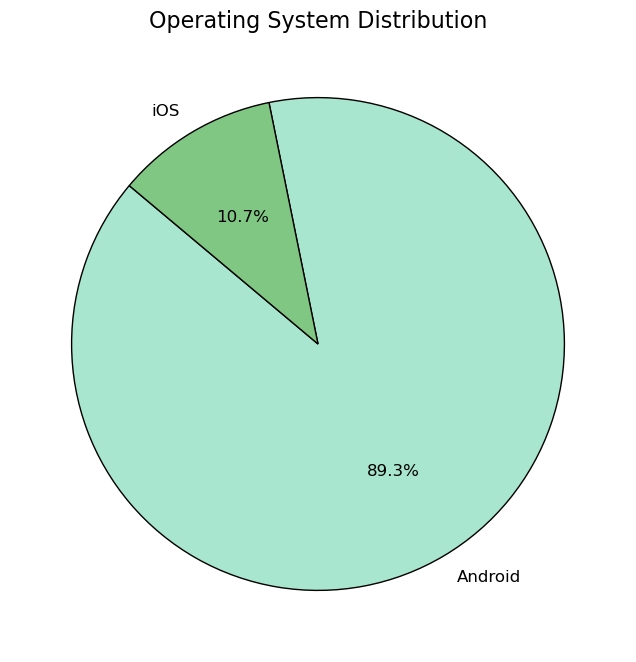

In [70]:
os_system = df['os'].value_counts()
colors = ['#A8E6CF', '#81C784', '#4CAF50', '#388E3C', '#1B5E20']

plt.figure(figsize=(8, 8))
plt.pie(
    os_system,
    labels=os_system.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor':'black', 'linewidth':1},
    colors=colors[:len(os_system)],  # match number of categories
    textprops={'fontsize': 12}
)

plt.title("Operating System Distribution", fontsize=16)
plt.show()




**. Operating System Distribution:**   
- Most phones in the dataset are **Android**, followed by **iOS**.  
- Visualizes the market share of different OS in this dataset.


### 🎨Pie Chart for 5G Support

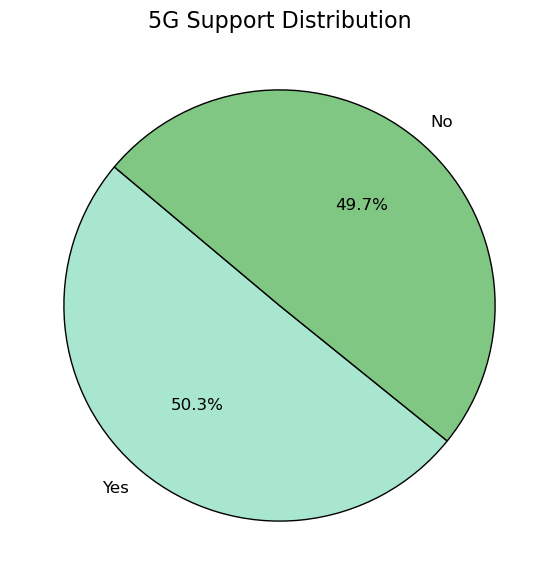

In [71]:
gsupport = df['5g_support'].value_counts()

# Custom color palette (soft + modern)
colors = ['#A8E6CF', '#81C784', '#4CAF50', '#388E3C', '#1B5E20']


plt.figure(figsize=(7, 7))
plt.pie(
    gsupport,
    labels=gsupport.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor':'black', 'linewidth':1},
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.title("5G Support Distribution", fontsize=16)
plt.show()

**. 5G Support Distribution:**  
- Displays how many phones support 5G vs those that do not.  
- Majority of smartphones in the dataset **support 5G**, indicating modern devices.  

## 🎻 Violin Plot

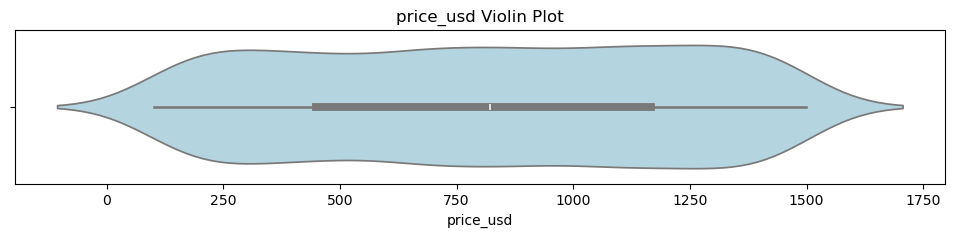

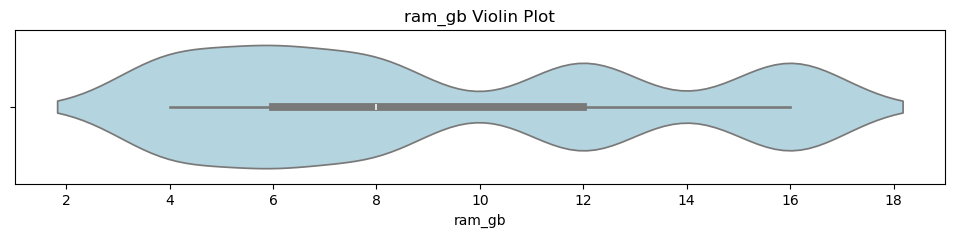

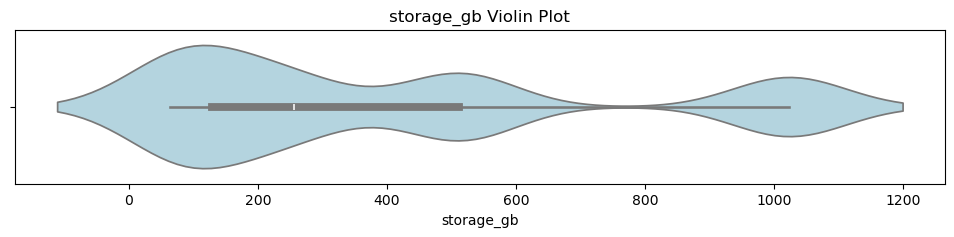

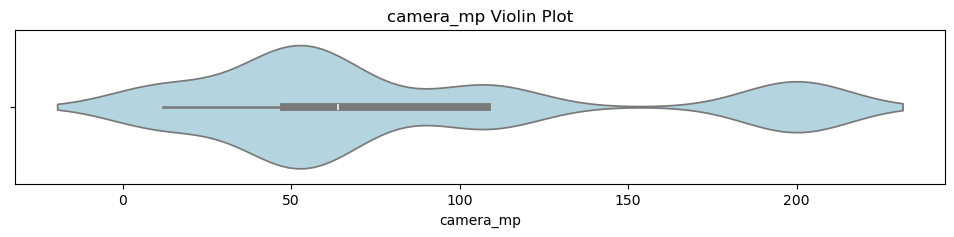

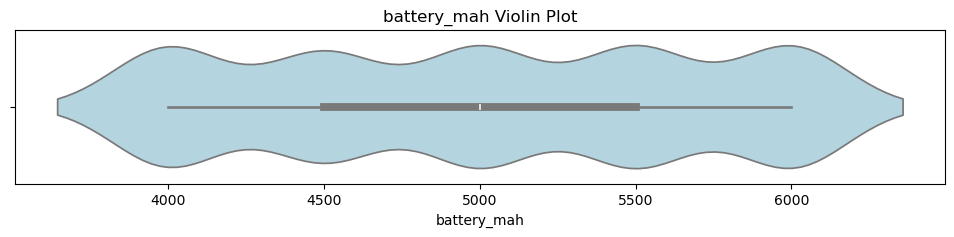

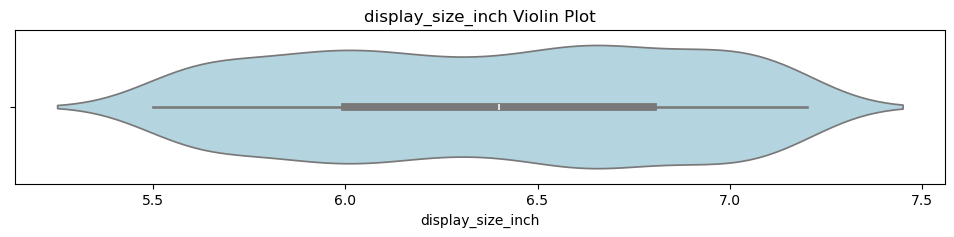

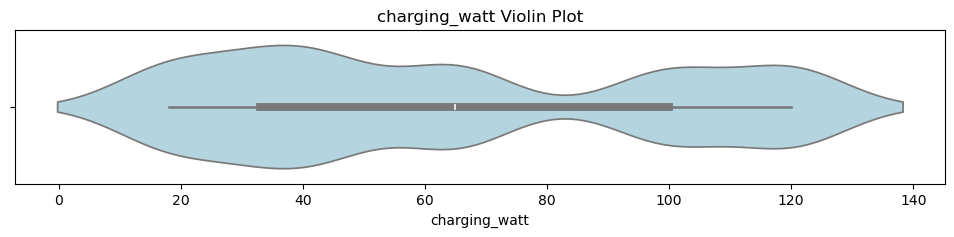

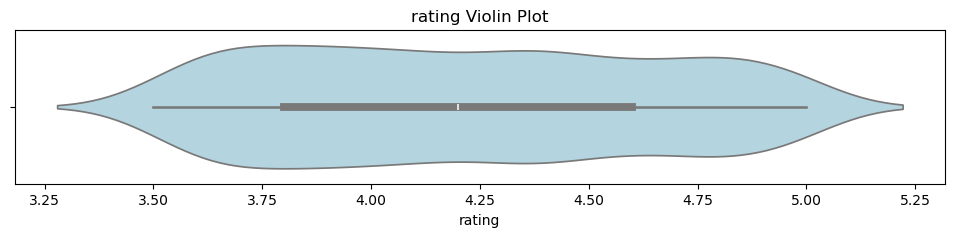

In [72]:
for col in num_cols:
    plt.figure(figsize=(12, 2))
    sns.violinplot(x=df[col], color='lightblue')
    plt.title(f"{col} Violin Plot")
    plt.show()

## 📊 Bar Chart

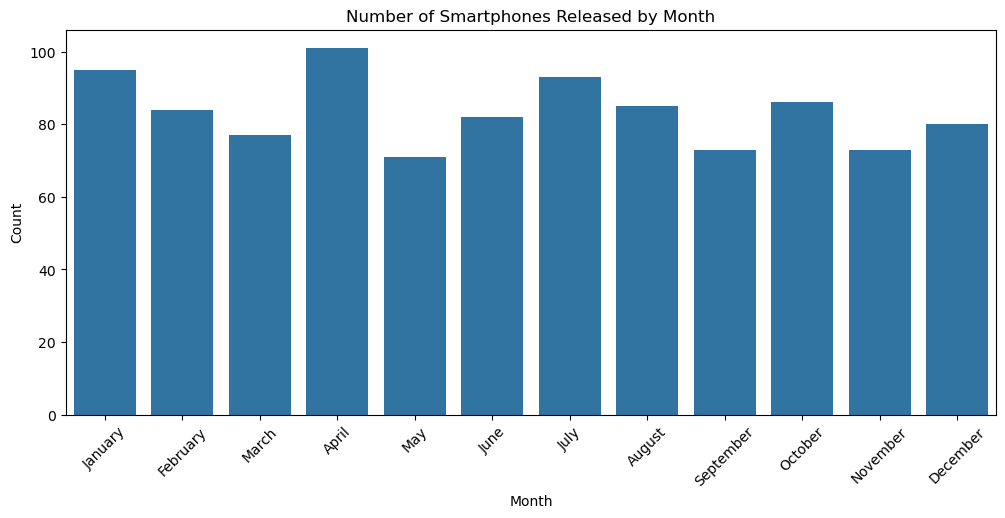

In [73]:
plt.figure(figsize=(12,5))
sns.countplot(x='release_month', data=df, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.title("Number of Smartphones Released by Month")
plt.ylabel("Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


### Smartphone Releases by Month

- The bar chart shows how many smartphones were released each month.  
- **April** has the highest number of releases, while **May** has the fewest.  
- This indicates that smartphone launches in this dataset are **seasonal**, with peaks in certain months.


## 📈 Line Plot

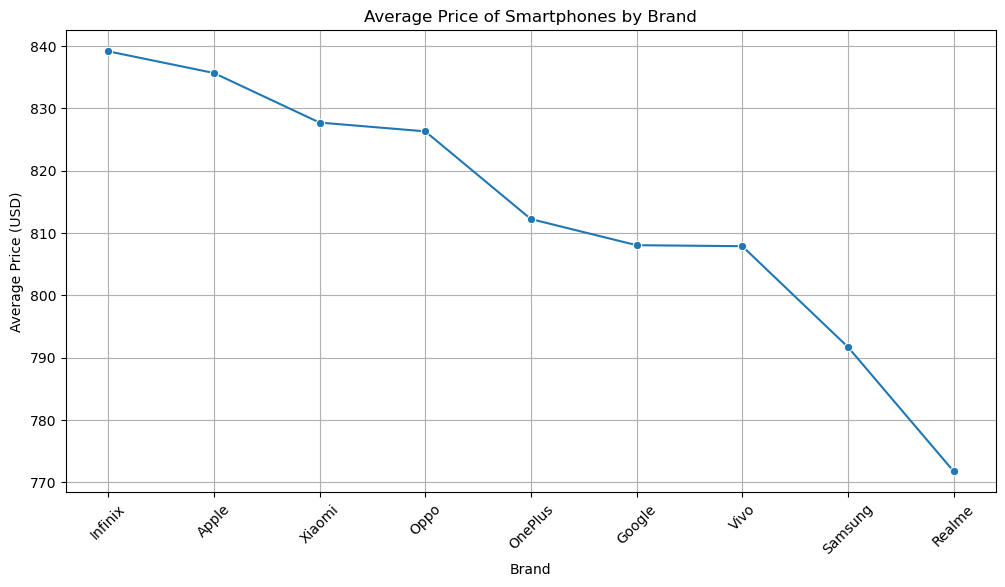

In [46]:
avg_price_brand = df.groupby('brand')['price_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_price_brand.index, y=avg_price_brand.values, marker='o')
plt.title("Average Price of Smartphones by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Average Price of Smartphones by Brand

This line plot shows the **average price of smartphones** for each brand:

- **X-axis** represents the different smartphone brands.  
- **Y-axis** represents the average price in USD.  
- The marker on each point shows the **actual average price** for that brand.  

**Observations:**  
- Premium brands like **Apple** have higher average prices.  
- Brands such as **Realme** and **Vivo** have lower average prices, indicating they focus more on budget-friendly smartphones.  

## Relationship Between Hardware Features and Average Smartphone Price

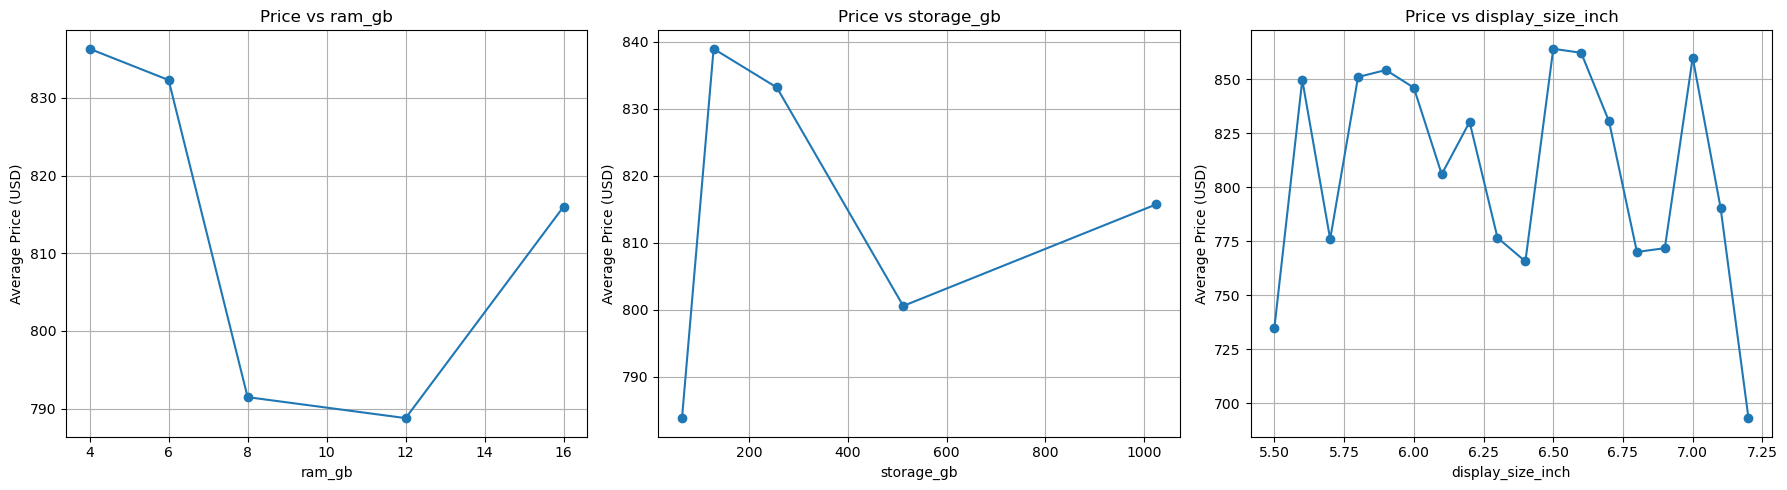

In [47]:

# Features to plot
features = ['ram_gb', 'storage_gb', 'display_size_inch']

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18,5))  # 1 row, 3 columns

for i, feature in enumerate(features):
    # Aggregate: average price per feature value
    avg = df.groupby(feature)['price_usd'].mean()
    
    # Plot line
    axes[i].plot(avg.index, avg.values, marker='o', label=f'Price vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Average Price (USD)')
    axes[i].set_title(f'Price vs {feature}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


### Summary of Price vs Features

The subplots show how the **average smartphone price** changes with each numeric feature:

1. **RAM (GB)** – Phones with higher RAM generally have higher prices, but the increase is moderate.  
2. **Storage (GB)** – Increasing storage has a more noticeable effect on price; devices with large storage tend to cost more.  
3. **Display Size (inch)** – Price slightly increases with bigger screens, but the effect is smaller compared to RAM and storage.  

**Overall:**  
- Price is influenced by multiple hardware features, but storage seems to have the strongest effect among these three.  
- Subplots make it easier to see trends individually, avoiding scale issues that would appear in a single combined plot.


## Heatmap visualization

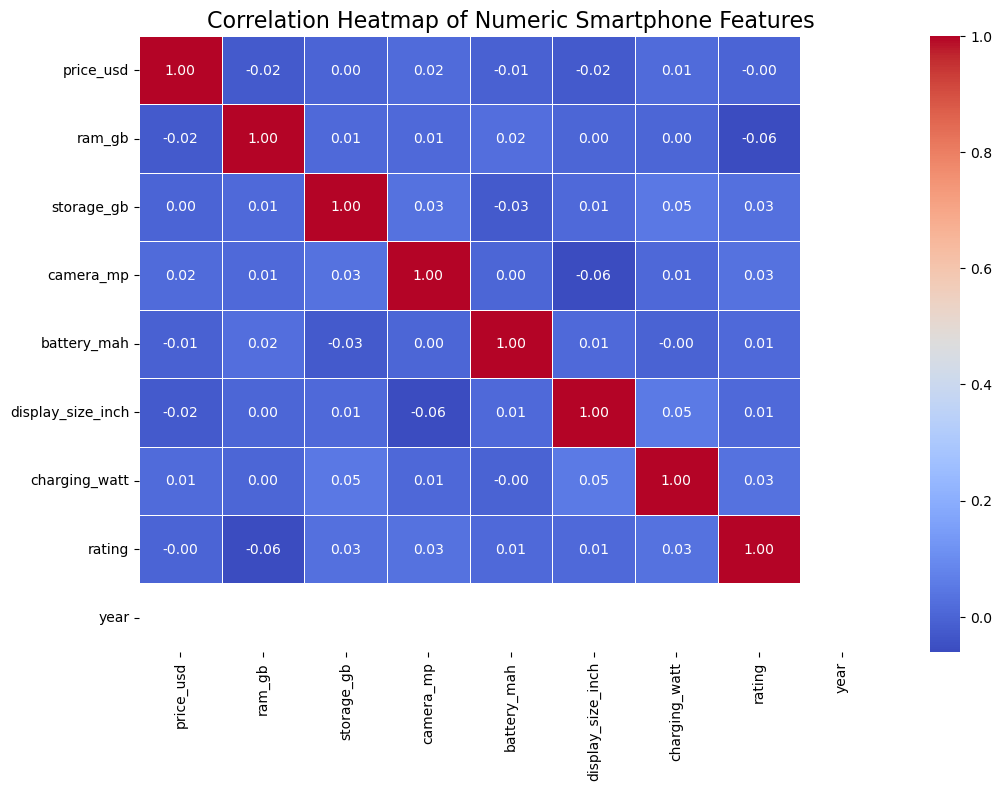

In [54]:
numeric_cols = df.select_dtypes(include='number')

corr = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",  # You can change to "viridis", "YlGnBu", etc.
    linewidths=0.5,
    cbar=True
)
plt.title("Correlation Heatmap of Numeric Smartphone Features", fontsize=16)
plt.show()


### Price Correlations
- **RAM (ram_gb):** -0.02 → Very weak negative correlation; almost no impact on price.
- **Storage (storage_gb):** 0.00 → No correlation; storage size does not predict price.
- **Camera (camera_mp):** 0.02 → Very weak positive correlation; camera resolution minimally affects price.
- **Battery (battery_mah):** -0.01 → Negligible correlation; battery size has no effect on price.
- **Display size (display_size_inch):** -0.02 → Very weak negative correlation; screen size is not related to price.
- **Charging wattage (charging_watt):** 0.01 → Almost no correlation; charging speed is not a factor.
- **Rating:** -0.00 → No correlation; ratings do not influence price linearly.

### Conclusion
- Numeric features alone do **not explain smartphone pricing** in this dataset.
- Price likely depends on **categorical features** like brand, model, or market factors.

### My Notes on Correlation vs Price

I see that the correlation values show **linear relationships**, but in my dataset, the price doesn't seem strongly correlated with RAM, storage, camera, battery, or display size.  

I think this is because the differences inside one feature are small, so even if a camera goes from 100 MP to 120 MP, the price doesn't change much in the data.  

This means the relationship could be **non-linear** or influenced by multiple features together.  

So just looking at correlation doesn't tell the full story.
